In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, NMF
from luwiji.dimensionality_reduction import illustration

In [4]:
df = pd.read_csv("data/lfw_people.csv")
df.head()

,pixel_1-1,pixel_1-2,pixel_1-3,pixel_1-4,pixel_1-5,pixel_1-6,pixel_1-7,pixel_1-8,pixel_1-9,pixel_1-10,...,pixel_87-57,pixel_87-58,pixel_87-59,pixel_87-60,pixel_87-61,pixel_87-62,pixel_87-63,pixel_87-64,pixel_87-65,name
0,57,60,78,120,156,178,195,210,221,222,...,41,17,15,20,19,18,17,16,22,Winona Ryder
1,66,80,88,68,63,96,115,127,139,148,...,25,18,11,8,8,8,8,8,9,Jean Chretien
2,18,14,15,13,14,23,55,92,125,154,...,253,251,240,172,47,20,22,22,25,Carlos Menem
3,76,113,172,201,199,190,177,167,167,171,...,82,115,131,137,136,138,140,143,143,Ariel Sharon
4,79,70,70,81,99,126,144,156,164,168,...,88,91,90,89,85,83,80,74,64,Alvaro Uribe


# Dataset Spliting

In [5]:
X = df.drop(columns="name").values
y = df.name.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2418, 5655), (605, 5655), (2418,), (605,))

# Visualize data

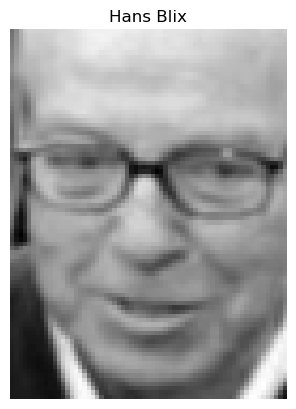

In [6]:
plt.imshow(X_train[1].reshape(87,65), cmap='gray')
plt.title(y_train[1])
plt.axis('off');

# Decide n_components

Text(0, 0.5, 'Cumulative Explaine Variance')

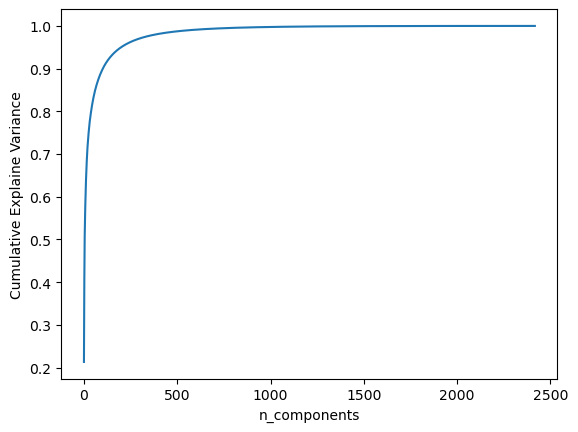

In [7]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel("n_components")
plt.ylabel("Cumulative Explaine Variance")

# Feature Extraction melalui dim reduction

In [8]:
pca = PCA(250, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [9]:
print(X_train.shape) # like hidden layer
print(X_train_pca.shape) # weight / code
print(pca.components_.shape) # fitur

(2418, 5655)
(2418, 250)
(250, 5655)


## Visualize fitur (component)

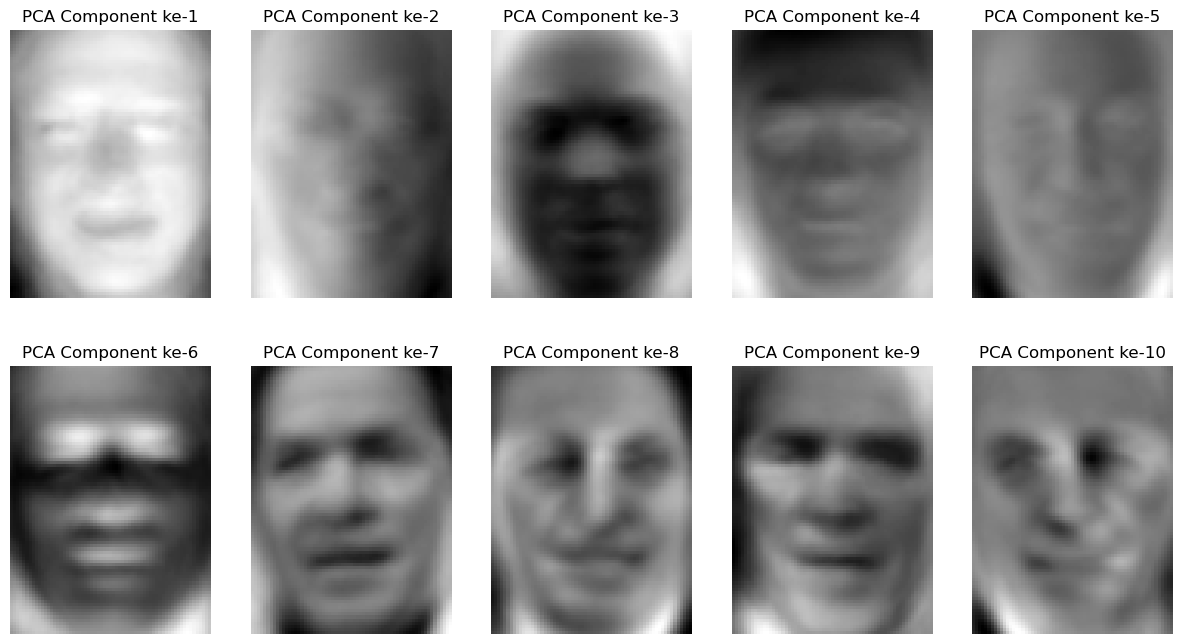

In [10]:
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(pca.components_[i].reshape(87, 65), cmap='gray')
    plt.title(f"PCA Component ke-{i+1}")
    plt.axis('off');

# Reconstuction Image

In [11]:
X_train_inv = pca.inverse_transform(X_train_pca)

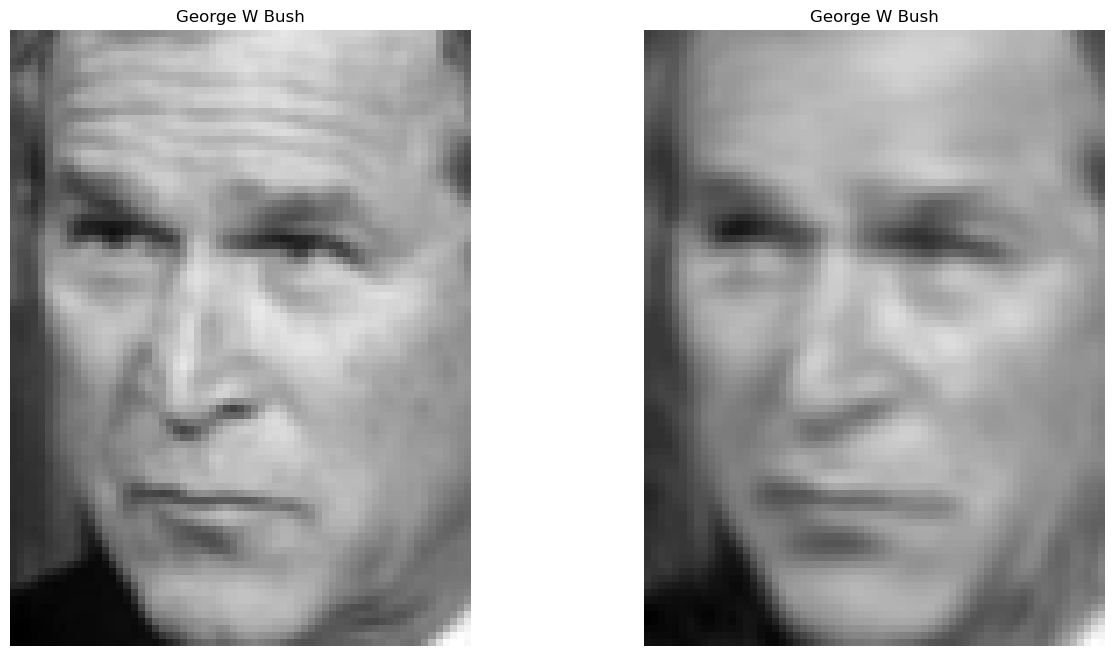

In [12]:
plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.imshow(X_train[2].reshape(87,65), cmap='gray')
plt.title(y_train[2])
plt.axis('off');

plt.subplot(122)
plt.imshow(X_train_inv[2].reshape(87,65), cmap='gray')
plt.title(y_train[2])
plt.axis('off');

# Rekonstruksi PCA adalah kombinasi linear dari komponennya

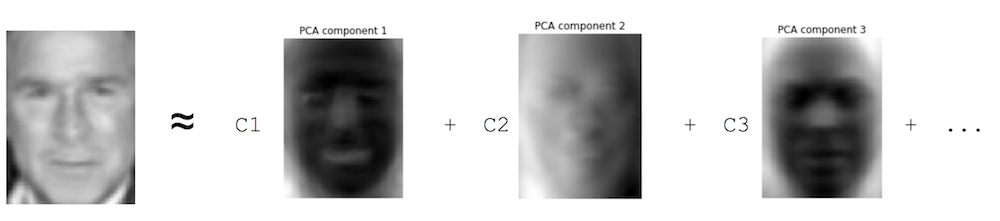

In [13]:
illustration.pca_combination

# Artinya apa? Kita bisa encode wajah orang -> face verification

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
soekarno1 = plt.imread("data/sample_faces/soekarno1.png").reshape(1, -1)
soekarno2 = plt.imread("data/sample_faces/soekarno2.png").reshape(1, -1)
hatta = plt.imread("data/sample_faces/hatta.png").reshape(1, -1)

In [16]:
soekarno1.shape

(1, 5655)

In [17]:
pca.transform(soekarno1).shape

(1, 250)

In [18]:
s1 = pca.transform(soekarno1)
s2 = pca.transform(soekarno2)
h1 = pca.transform(hatta)

In [19]:
cosine_similarity(s1, s2)

array([[0.99982706]])

In [20]:
cosine_similarity(s1, h1)

array([[0.9997759]])

In [21]:
sim = cosine_similarity(s1, X_train_pca)

In [22]:
sim.argsort()

array([[1092,  955, 1446, ..., 2233, 2262, 1987]])

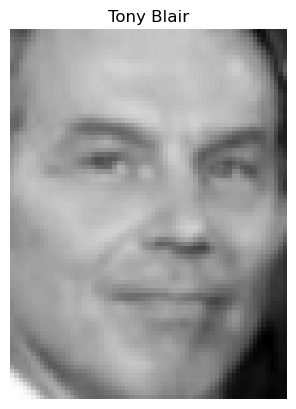

In [23]:
plt.imshow(X_train[1092].reshape(87,65), cmap='gray')
plt.title(y_train[1092])
plt.axis('off');

# Other Alternative -> Non-Negative Matrix Factorization

selain SVD, terdapat metode factorisasi yang lain yang disebut NMF:<br>
dulu dikenal sebagai positif matrix factorization, tapi sekarang lebih dikenal dengan Non-Negative Matrix Factorization (NMF / NNMF)<br>
SVD mencari orthogonal dengan menggunakan kombinasi linear dari fitur sedangkan NMF memaksa nilainya untuk tidak negatif.<br>
kelebihan NMF:<br>
- nilai yang positif (cocok untuk image)
- komponen yang dihasilkan biasanya lebih mudah diinterpretasikan (karena semuanya positif, menghindari nilai yang cancelling)

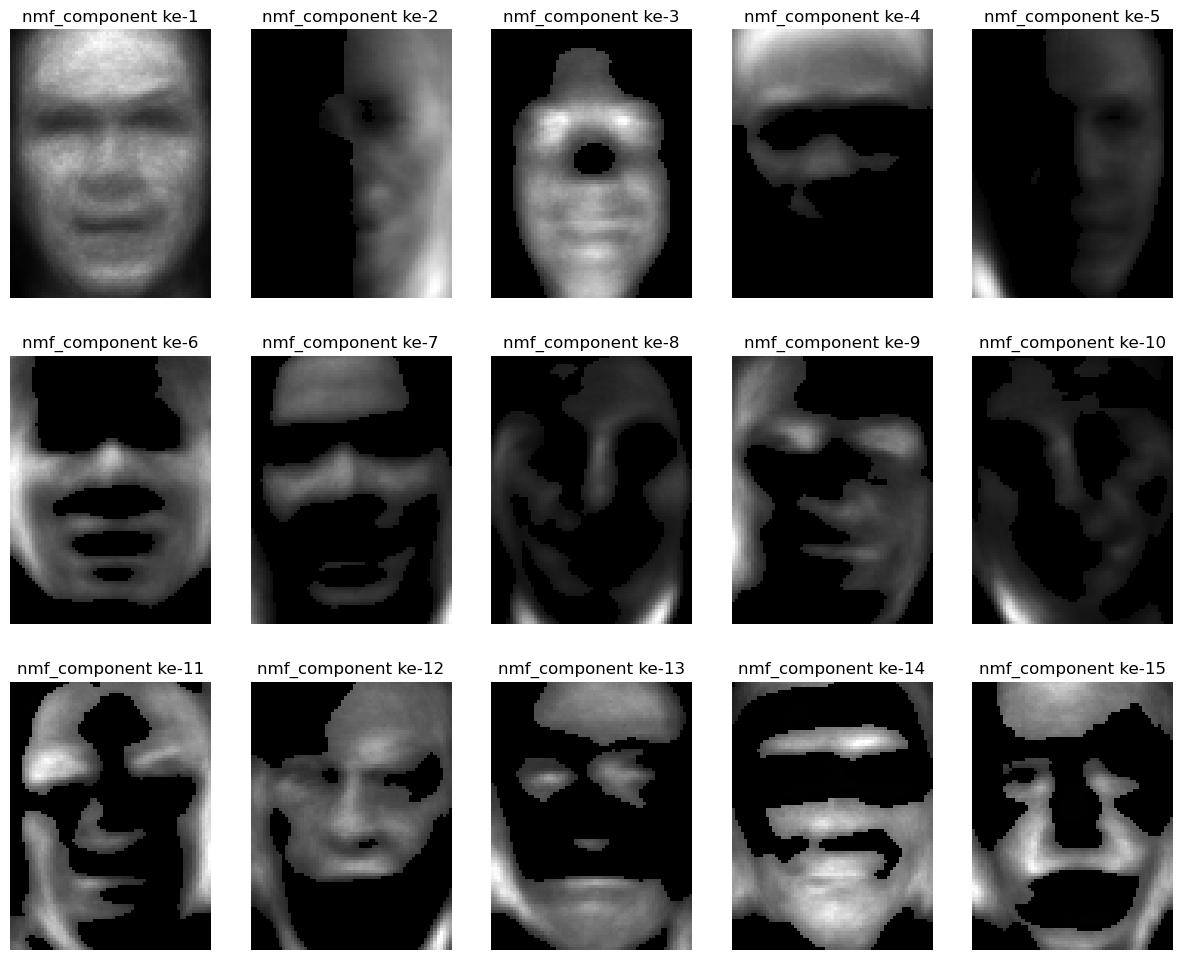

In [24]:
nmf = NMF(250, solver='mu')
X_train_nmf = nmf.fit_transform(X_train)
X_test_nmf = nmf.transform(X_test)

plt.figure(figsize=(15, 12))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(nmf.components_[i].reshape(87, 65), cmap='gray')
    plt.title(f"nmf_component ke-{i+1}")
    plt.axis('off');

In [28]:
soekarno1 = plt.imread("data/sample_faces/soekarno1.png").reshape(1, -1).astype(np.float64)
soekarno2 = plt.imread("data/sample_faces/soekarno2.png").reshape(1, -1).astype(np.float64)
hatta = plt.imread("data/sample_faces/hatta.png").reshape(1, -1).astype(np.float64)

In [29]:
soekarno1.shape

(1, 5655)

In [30]:
nmf.transform(soekarno1).shape

(1, 250)

In [31]:
s1 = nmf.transform(soekarno1)
s2 = nmf.transform(soekarno2)
h1 = nmf.transform(hatta)

In [32]:
cosine_similarity(s1, s2)

array([[0.7133848]])

In [33]:
cosine_similarity(s1, h1)

array([[0.52761702]])

In [34]:
sim = cosine_similarity(s1, X_train_pca)

In [35]:
sim.argsort()

array([[ 766, 1773,  699, ..., 1827, 1706, 1729]])

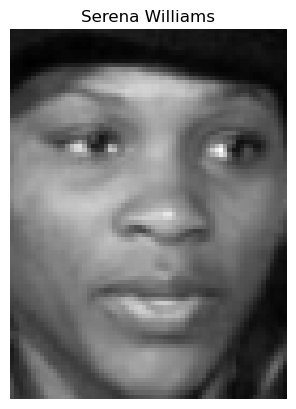

In [36]:
plt.imshow(X_train[766].reshape(87,65), cmap='gray')
plt.title(y_train[766])
plt.axis('off');

# Mean face / average face